In [1]:
import os
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
from torchvision.utils import save_image
from torch.autograd import Variable
import matplotlib.pyplot as plt
import pylab
import numpy as np
%load_ext autoreload
%autoreload 2

In [2]:
num_gpu = 1 if torch.cuda.is_available() else 0

# load the models
from dcgan import Discriminator, Generator

D = Discriminator(ngpu=1).eval()
G = Generator(ngpu=1).eval()

# load weights
D.load_state_dict(torch.load('weights/netD_epoch_99.pth'))
G.load_state_dict(torch.load('weights/netG_epoch_99.pth'))
if torch.cuda.is_available():
    D = D.cuda()
    G = G.cuda()

# generate some images

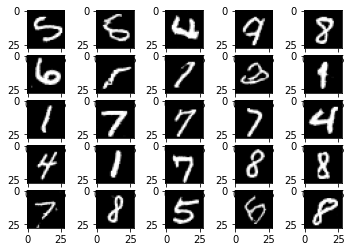

In [3]:
batch_size = 25
latent_size = 100

fixed_noise = torch.randn(batch_size, latent_size, 1, 1)
if torch.cuda.is_available():
    fixed_noise = fixed_noise.cuda()
fake_images = G(fixed_noise)


# z = torch.randn(batch_size, latent_size).cuda()
# z = Variable(z)
# fake_images = G(z)

fake_images_np = fake_images.cpu().detach().numpy()
fake_images_np = fake_images_np.reshape(fake_images_np.shape[0], 28, 28)
R, C = 5, 5
for i in range(batch_size):
    plt.subplot(R, C, i + 1)
    plt.imshow(fake_images_np[i], cmap='gray')
plt.show()

# run discriminator

In [4]:
outputs = D(fake_images)
print(outputs)

tensor([0.0820, 0.0396, 0.0336, 0.0991, 0.4450, 0.2329, 0.0895, 0.1496, 0.0105,
        0.5607, 0.4132, 0.0387, 0.0199, 0.2425, 0.1539, 0.0950, 0.2345, 0.5669,
        0.2356, 0.0864, 0.1361, 0.1797, 0.5642, 0.0381, 0.0546],
       device='cuda:0', grad_fn=<SqueezeBackward1>)
